In [134]:

# -- Importing relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime
import scipy.stats as st



In [135]:

# ---------------------- Initial details and save path for file
save_path = 'C:\\Users\\Micha\\OneDrive\\Projects\\depot_incident_analysis\\Python Scripts'
date = datetime.today().strftime('%Y-%m-%d')
name = '2024-DWG-Analysis' + '-' + date

In [136]:

# - Chart Parameters


year = '2024/25'
startperiod = 202201
endperiod = 202412
N = 38
fyearpoints = [6.5, 19.5, 31.5]
bigticks = [-0.5, 12.5, 25.5, N - 0.5]
bigticks2 = [-0.5, 12.5, 25.5, N - 0.5]
xlimitend = N - 0.5
ylimitend = 500


In [137]:

# ----------------------- Loading CSV File and Reading it


csv_path = 'C:\\Users\\Micha\\OneDrive\\Projects\\depot_incident_analysis\\csv\\all_incidents.csv'

# ------- Read CSV into DataFrame
smis_df = pd.read_csv(csv_path)

In [138]:

# ------ Finding out structure of dataframe
smis_df.info()
smis_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17655 entries, 0 to 17654
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   smis_reference          17655 non-null  object
 1   event_date              17655 non-null  object
 2   period                  17655 non-null  int64 
 3   place                   17384 non-null  object
 4   report_title            17655 non-null  object
 5   personal_accident_type  6341 non-null   object
 6   description             17655 non-null  object
dtypes: int64(1), object(6)
memory usage: 965.6+ KB


smis_reference                0
event_date                    0
period                        0
place                       271
report_title                  0
personal_accident_type    11314
description                   0
dtype: int64

In [139]:
# --- Looking at dataset sample

smis_df.head(5)

,smis_reference,event_date,period,place,report_title,personal_accident_type,description
0,SMIS2213332,2018-04-01 01:14:00.000,201801,Stewarts Lane Depot,Person in a prohibited area,NaN,Trespass - report of trespassers in or around ...
1,SMIS2213300,2018-04-01 04:12:00.000,201801,Lovers Walk Depot (Brighton),Person in a prohibited area,NaN,Trespass- Members of staff had reported two yo...
2,SMIS117054,2018-04-01 07:13:00.000,201801,Grove Park LMD (London),Irregular signal aspect sequence,NaN,COA 5N12 reported a COA (off to on) at shunt s...
3,SMIS309149,2018-04-02 06:00:00.000,201801,Manchester Longsight MDU,Slip trip or fall,"Slip, trip, fall",Longsight Depot 34 Road; Report of driver trip...
4,SMIS2213247,2018-04-02 23:30:00.000,201801,Farnham Traincare Depot,Person in a prohibited area,NaN,Trespass - 1A73 (SWR 22:23 London Waterloo to ...


In [140]:

# ---------------------------Combine report_title and personal_accident_type into a single field


smis_df['combined_report_title'] = smis_df.apply(
    lambda row: row['report_title'] if pd.isna(row['personal_accident_type']) or row['personal_accident_type'] == "" else row['personal_accident_type'], 
    axis=1
)

smis_df['combined_report_title'].head(5)

0         Person in a prohibited area
1         Person in a prohibited area
2    Irregular signal aspect sequence
3                    Slip, trip, fall
4         Person in a prohibited area
Name: combined_report_title, dtype: object

In [141]:
# ------ Identifying unique values for grouping

smis_df['combined_report_title'].unique()

array(['Person in a prohibited area', 'Irregular signal aspect sequence',
       'Slip, trip, fall', 'Railway operating incident',
       'Train derailment', 'Vandalism',
       'Interaction with plant, machine, equip or tool',
       'Train-track control system brake application or fault',
       'Interaction with road vehicle', 'Signal passed at danger',
       'Hazardous susbstance',
       'Train striking or struck by animal, object or road vehicle',
       'Electric shock', 'Train Fault',
       'Other event resulting in injury or fatality',
       'Environmental contamination',
       'Train colliding with another train', 'Fire or explosion (train)',
       'Object, road vehicle or animal on or near the line',
       'Assault or abuse', 'Awkward body movement',
       'Speed restriction warning  board fault or irregularity',
       'Interaction with train',
       'Interaction with railway infrastructure',
       'Railway infrastructure fault', 'Life saving rule breach',
       '

In [142]:

# ----------------------- Categorising and defining variables for each event category

awkward_body_movement = ['Awkward body movement']
interaction_with_plant_machine_equip_or_tool = ['Interaction with plant, machine, equip or tool']
irregular_signal_aspect_sequence = ['Irregular signal aspect sequence']
non_rail_vehicle_colliding_with_animal_object_or_another_road_vehicle = ['Non-rail vehicle colliding with animal, object or another road vehicle']
person_in_a_prohibited_area = ['Person in a prohibited area']
public_behaviour_form = ['Public behaviour form']
railway_operating_incident = ['Railway operating incident']
signal_passed_at_danger = ['Signal passed at danger']
slip_trip_fall = ['Slip, trip, fall']
spad_and_operating_incident_form = ['SPAD and operating incident form']
train_derailment = ['Train derailment']
train_failure_form = ['Train failure form']
train_fault = ['Train Fault']
train_striking_or_struck_by_animal_object_or_road_vehicle = ['Train striking or struck by animal, object or road vehicle']
other = [
    'Assault or abuse', 'Control system form', 'Electric shock', 'Environmental contamination',
    'Fire or explosion', 'Flooding of the line', 'Hazardous condition', 'Hazardous susbstance',
    'Infrastructure failure and irregular signal aspect form', 'Incorrect usage of level crossing',
    'Interaction with an animal', 'Interaction with person', 'Interaction with railway infrastructure',
    'Interaction with road vehicle', 'Interaction with train', 'Intervening in a suicide or self harm event',
    'Life saving rule breach', 'Loss of load from a road vehicle', 'Machine plant equipment or tool failure',
    'Object, road vehicle or animal on or near the line', 'Other event resulting in injury or fatality',
    'Person interacting with animal, object, vehicle or another person', 'Personal accident form',
    'Railway infrastructure fault', 'Speed restriction warning board fault or irregularity',
    'Train axle or wheel loading fault detection', 'Train colliding with another train',
    'Train-track control system brake application or fault', 'Vandalism'
]

person_in_a_prohibited_area_public_behaviour = ['Person in a prohibited area', 'Public behaviour form']
railway_operating_incident_and_spads = ['Railway operating incident', 'Signal passed at danger', 'SPAD and operating incident form']

In [143]:

# ------------ Assigning new categories to each event using the variables 


def map_event_type(event):
    if event in awkward_body_movement:
        return 'Awkward body movement'
    elif event in interaction_with_plant_machine_equip_or_tool:
        return 'Interaction with plant, machine, equip or tool'
    elif event in irregular_signal_aspect_sequence:
        return 'Irregular signal aspect sequence'
    elif event in non_rail_vehicle_colliding_with_animal_object_or_another_road_vehicle:
        return 'Non-rail vehicle colliding with animal, object or another road vehicle'
    elif event in person_in_a_prohibited_area:
        return 'Person in a prohibited area'
    elif event in public_behaviour_form:
        return 'Public behaviour form'
    elif event in railway_operating_incident:
        return 'Railway operating incident'
    elif event in signal_passed_at_danger:
        return 'Signal passed at danger'
    elif event in slip_trip_fall:
        return 'Slip, trip, fall'
    elif event in spad_and_operating_incident_form:
        return 'SPAD and operating incident form'
    elif event in train_derailment:
        return 'Train derailment'
    elif event in train_failure_form:
        return 'Train failure form'
    elif event in train_fault:
        return 'Train Fault'
    elif event in train_striking_or_struck_by_animal_object_or_road_vehicle:
        return 'Train striking or struck by animal, object or road vehicle'
    elif event in other:
        return 'Other'
    elif event in person_in_a_prohibited_area_public_behaviour:
        return 'Person in a prohibited area/Public behaviour'
    elif event in railway_operating_incident_and_spads:
        return 'Railway operating incident and SPADs'
    return 'Other'  # Defaults to 'Other' if event doesn't match any category

# ---- Apply the mapping to create a new column for event categories


smis_df['event_category'] = smis_df['combined_report_title'].apply(map_event_type)

In [144]:

# -------------------------------------- Group data for counts 
# Count total events by period
smis_counts1 = smis_df.groupby(['period'])['event_category'].count().fillna(0)

# Count events by period and category
smis_counts2 = smis_df.groupby(['period', 'event_category'])['smis_reference'].count().unstack('event_category').fillna(0)

# Add a column for total depot incidents
smis_counts2['TotalDepotIncidents'] = smis_counts2.sum(axis=1)


# --------- Add a column for total depot incidents 
smis_counts2['TotalDepotIncidents'] = smis_counts2.sum(axis=1)

In [145]:
# ----- make dataframe for results 

Nyears = 3 #number of years in graph 
ymax = int(year[:4])
ymin = int(ymax)-Nyears+1
for i in range(Nyears+1):
    p1 = np.arange(1,14)
    y1 = int(ymax)-Nyears+i
    y2 = y1+1
    data = pd.DataFrame({'Periods':p1.astype(str)})
    data['Index'] = str(y1)+data['Periods'].str.zfill(2)
    data['Index'] = data['Index'].astype(int)
    data['Periods'] = 'P'+data['Periods']
    data['Fiscal year'] = str(y1)+'/'+str(y2)
    if i==0:
        data1 = data
    else:
        data1 = pd.concat([data1, data],sort=True)

# ---- make smis and sidb dataframes
data1 = data1.set_index('Index')

smis_data2 = data1.join(smis_counts2)
smis_data2 = smis_data2.fillna(0)

In [146]:
# ------------------------------ Creating Annual Moving Average

smis_data2['Depot Events AMA'] = smis_data2['TotalDepotIncidents'].rolling(window=13).mean()

In [147]:
# ---------------- Setting start and end period

smis_data2 = smis_data2[smis_data2.index>=startperiod] #only want periods after this

smis_data2 = smis_data2[smis_data2.index<=endperiod] #only want periods before this 

In [148]:
# ----------- Grouping extra events together 

smis_data2['Railway operating incident and SPADs'] = (
    smis_data2['Railway operating incident'] +
    smis_data2['SPAD and operating incident form'] +
    smis_data2['Signal passed at danger']
)
smis_data2['Person in a prohibited area/Public behaviour'] = (
    smis_data2['Person in a prohibited area'] +
    smis_data2['Public behaviour form']
)

In [149]:
# --------------------- Calculating upper & lower bounds

conf_intervals_cut = smis_counts2[smis_counts2.index>=202201]  # cut the data that we will be calculating the upper and lower bounds on
conf_intervals_cut = conf_intervals_cut[conf_intervals_cut.index<=202313]  # cut the data that we will be calculating the upper and lower bounds on
#
#stdev = np.std(upper_lower_cut['TotalDepotIncidents'])                 # calculate the standard deviation of the cut of data - dont use this as actually need the standard error of the mean
conf_intervals_mean = np.mean(conf_intervals_cut['TotalDepotIncidents']) # calculate the mean of the cut of data
#
bounds = st.norm.interval(confidence=0.95, loc=conf_intervals_mean, scale=st.sem(conf_intervals_cut['TotalDepotIncidents']))       #I think it is correct to use the standard error of the mean as we are looking at the whole population
#bounds_t = st.t.interval(alpha=0.95, df=len(conf_intervals_cut['TotalDepotIncidents'])-1, loc=conf_intervals_mean, scale=st.sem(conf_intervals_cut['TotalDepotIncidents']))       #I think it is correct to use the standard error of the mean as we are looking at the whole population

lowerbound = bounds[0]
upperbound = bounds[1]

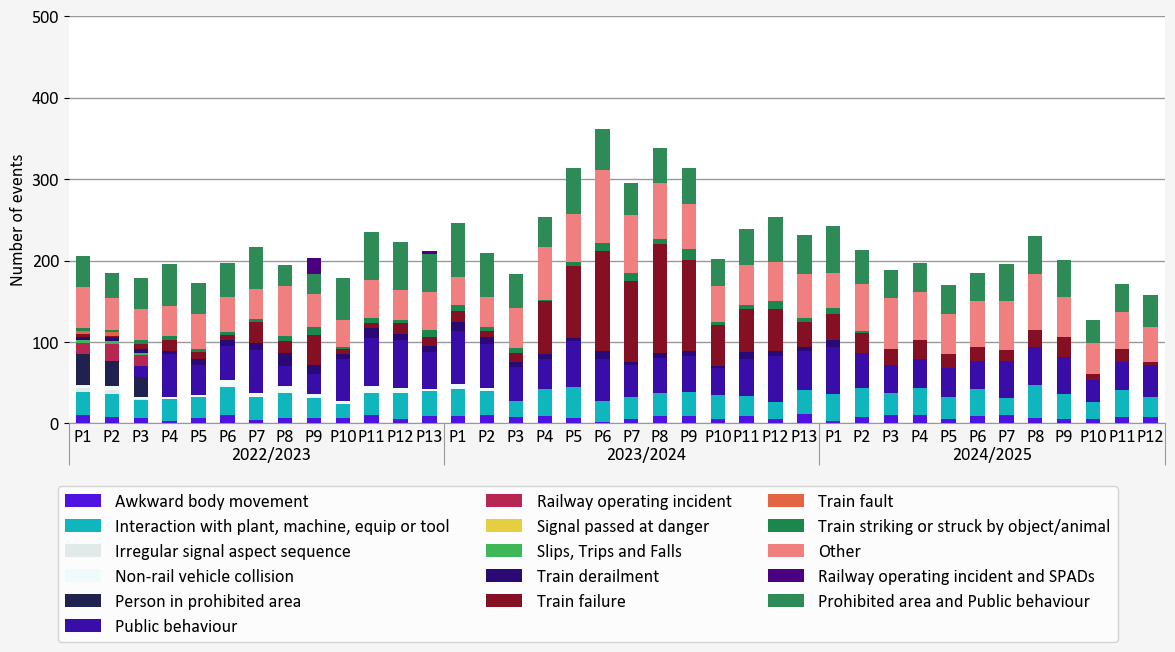

In [150]:
# ------------------- Drawing Chart pt 1

#set font parameters
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.size'] = 13.0

#parameters for graphs
fig = plt.figure(figsize=(13, 6))
width = 0.5
#N = Nyears*13
ind = np.arange(0,N,1)
bordercolour = '0.6'
#graphtitle = 'Trend in Depot events' #graph title

# ------------------- Drawing Chart pt 2

# Creatomg bar variables
awkwardmovementbar = np.array(smis_data2['Awkward body movement'])
interactionplantmachinebar = np.array(smis_data2['Interaction with plant, machine, equip or tool'])
irregularsignalbar = np.array(smis_data2['Irregular signal aspect sequence'])
nrvcollisionbar = np.array(smis_data2['Non-rail vehicle colliding with animal, object or another road vehicle'])
prohibitedareabar = np.array(smis_data2['Person in a prohibited area'])
pubbehaviourbar = np.array(smis_data2['Public behaviour form'])
roibar = np.array(smis_data2['Railway operating incident'])
spadbar = np.array(smis_data2['Signal passed at danger'])
sliptripfallbar = np.array(smis_data2['Slip, trip, fall'])
spadincidentbar = np.array(smis_data2['SPAD and operating incident form'])
derailmentbar = np.array(smis_data2['Train derailment'])
trainfailurebar = np.array(smis_data2['Train failure form'])
trainfaultbar = np.array(smis_data2['Train Fault'])
trainstrikeorstruckbar = np.array(smis_data2['Train striking or struck by animal, object or road vehicle'])
otherbar = np.array(smis_data2['Other'])
piprohibitedpublicbehaviourbar = np.array(smis_data2['Person in a prohibited area/Public behaviour'])
roiandspadsbar = np.array(smis_data2['Railway operating incident and SPADs'])

# --------------------- Drawing Chart pt 3

# x tick mark locations for all graphs
# making ticks and labels for big graph
ticks1 = np.arange(0,N,1) #set tick intervals
ticklabels1 = smis_data2['Periods'].iloc[ticks1] #get labels at correct intervals
ticklabels1 = ticklabels1.tolist()
fyears = '\n' + smis_data2['Fiscal year'].dropna().unique() #fiscal years (\n makes it go one line below)
ticklabels1 = ticklabels1 + fyears.tolist()
ticks1 = ticks1.tolist() + fyearpoints

# ---------------------- Drawing Chart pt 4

ax1 = fig.add_subplot(1,1,1)
#set labels
ax1.set(ylabel='Number of events')
#set xticks
ax1.set_xlim(-0.5,xlimitend)
ax1.set_ylim(0,ylimitend)
ax1.set_xticks(ticks1, minor=True)
ax1.set_xticklabels(ticklabels1, minor=True)
ax1.set_xticks(bigticks)
ax1.set_xticklabels([])
ax1.tick_params(axis='x',which='minor',length=0)
ax1.tick_params(axis='x',which='major',length=30,color=bordercolour)


# ----------------------- Plotting Chart pt 1

# gridlines
ax1.yaxis.grid(which="major", color=bordercolour, linestyle='-', linewidth=1, zorder=0) #add gridlines

# plot bar graph

ax1.bar(ind, awkwardmovementbar, width, color=(79/255, 19/255, 225/255), zorder=3, label='Awkward body movement')
ax1.bar(ind, interactionplantmachinebar, width, color=(16/255, 182/255, 190/255), zorder=3, 
        bottom=awkwardmovementbar, label='Interaction with plant, machine, equip or tool')
ax1.bar(ind, irregularsignalbar, width, color=(225/255, 234/255, 232/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar, label='Irregular signal aspect sequence')
ax1.bar(ind, nrvcollisionbar, width, color=(240/255, 249/255, 252/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar, 
        label='Non-rail vehicle collision')
ax1.bar(ind, prohibitedareabar, width, color=(33/255, 33/255, 79/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar, 
        label='Person in prohibited area')
ax1.bar(ind, pubbehaviourbar, width, color=(57/255, 13/255, 168/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar, 
        label='Public behaviour')
ax1.bar(ind, roibar, width, color=(184/255, 38/255, 82/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar + pubbehaviourbar, 
        label='Railway operating incident')
ax1.bar(ind, spadbar, width, color=(230/255, 206/255, 65/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar + pubbehaviourbar + roibar, 
        label='Signal passed at danger')
ax1.bar(ind, sliptripfallbar, width, color=(62/255, 183/255, 88/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + 
               prohibitedareabar + pubbehaviourbar + roibar, 
        label='Slips, Trips and Falls')
ax1.bar(ind, derailmentbar, width, color=(40/255, 9/255, 117/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar + pubbehaviourbar + roibar + spadbar, 
        label='Train derailment')
ax1.bar(ind, trainfailurebar, width, color=(133/255, 16/255, 36/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar + pubbehaviourbar + roibar + spadbar + derailmentbar, 
        label='Train failure')
ax1.bar(ind, trainfaultbar, width, color=(229/255, 101/255, 66/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar + pubbehaviourbar + roibar + spadbar + derailmentbar + trainfailurebar, 
        label='Train fault')
ax1.bar(ind, trainstrikeorstruckbar, width, color=(27/255, 135/255, 76/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar + pubbehaviourbar + roibar + spadbar + derailmentbar + trainfailurebar + trainfaultbar, 
        label='Train striking or struck by object/animal')
ax1.bar(ind, otherbar, width, color=(240/255, 128/255, 128/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar + pubbehaviourbar + roibar + spadbar + derailmentbar + trainfailurebar + trainfaultbar + trainstrikeorstruckbar, 
        label='Other')
ax1.bar(ind, roiandspadsbar, width, color=(75/255, 0/255, 130/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar + pubbehaviourbar + roibar + spadbar + derailmentbar + trainfailurebar + trainfaultbar + trainstrikeorstruckbar + otherbar, 
        label='Railway operating incident and SPADs')
ax1.bar(ind, piprohibitedpublicbehaviourbar, width, color=(46/255, 139/255, 87/255), zorder=3, 
        bottom=awkwardmovementbar + interactionplantmachinebar + irregularsignalbar + nrvcollisionbar + prohibitedareabar + pubbehaviourbar + roibar + spadbar + derailmentbar + trainfailurebar + trainfaultbar + trainstrikeorstruckbar + otherbar, 
        label='Prohibited area and Public behaviour')


# ------------------------ Setting Layout

# remove borders and change colours
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_color(bordercolour)

# Adjust layout
fig.tight_layout(pad=4.0)  # Ensure there is enough space between elements

# Move legend outside of the plot to the right
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=3) # 3 Columns underneath plot

fig.patch.set_facecolor('whitesmoke')

# -------------------------- Visualising chart
plt.show()

